In [214]:
import pandas as pd
import numpy as np
import nltk
import requests
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pymorphy2
import os
import gdown

from functools import partial
from tqdm import tqdm
from collections import Counter
from nltk.corpus import stopwords
from warnings import filterwarnings

In [2]:
filterwarnings('ignore')
sns.set_palette('viridis')
tqdm.pandas()
nltk.download('punkt')
nltk.download('omw-1.4', quiet=True)
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
ukrainian_stopwords = set(
    requests.request('get', 'https://raw.githubusercontent.com/skupriienko/Ukrainian-Stopwords/master/stopwords_ua.txt').content.decode('utf-8').splitlines()
)

In [215]:
# Download dataset
if not os.path.exists('./dataset.csv'):
    gdown.download(id='1h0rdgQHXcWB09OGh7P2gcwGZyqgrQOoH')

In [4]:
df = pd.read_csv('dataset.csv')

# How many messages are present per group

In [5]:
channels_count_df = (
    df.groupby(['label', 'sourced_lang','channel'])
    .agg({'text' :'count'})
    .rename(columns={
        'text':'messages_count'
    })
    .reset_index(level='channel')
    .groupby(['label', 'sourced_lang'])
    .agg({
        'channel': 'count',
        'messages_count': 'sum'
    })
    .rename(columns={
        'channel':'channels_count'
    })
)
temp_df = pd.concat([
    channels_count_df,
    pd.DataFrame([{
        'channels_count':0,
        'messages_count':0
    }], index=pd.MultiIndex.from_tuples([
        ('1', 'uk')
    ]))
]).rename(columns={
    'channels_count': 'Count of channels',
    'messages_count': 'Count of messages'
})
temp_df.index.names = ['Label', 'Sourced Lang']
display(temp_df)
# print(temp_df.to_latex())

Count of channels  Count of messages
Label Sourced Lang                                      
0     ru                            1               9507
      uk                            8             292875
1     ru                           36             553468
      uk                            0                  0

\begin{tabular}{llrr}
\toprule
  &    &  Count of channels &  Count of messages \\
Label & Sourced Lang &                    &                    \\
\midrule
0 & ru &                  1 &               9507 \\
  & uk &                  8 &             292875 \\
1 & ru &                 36 &             553468 \\
  & uk &                  0 &                  0 \\
\bottomrule
\end{tabular}



# How many messages do each channel has

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855850 entries, 0 to 855849
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   message_id    855850 non-null  int64 
 1   text          855850 non-null  object
 2   views         855850 non-null  int64 
 3   date          855850 non-null  object
 4   channel       855850 non-null  object
 5   label         855850 non-null  int64 
 6   sourced_lang  855850 non-null  object
dtypes: int64(3), object(4)
memory usage: 45.7+ MB


In [7]:
plt.rcParams['pgf.texsystem'] = 'xelatex'

In [ ]:
df['channel']

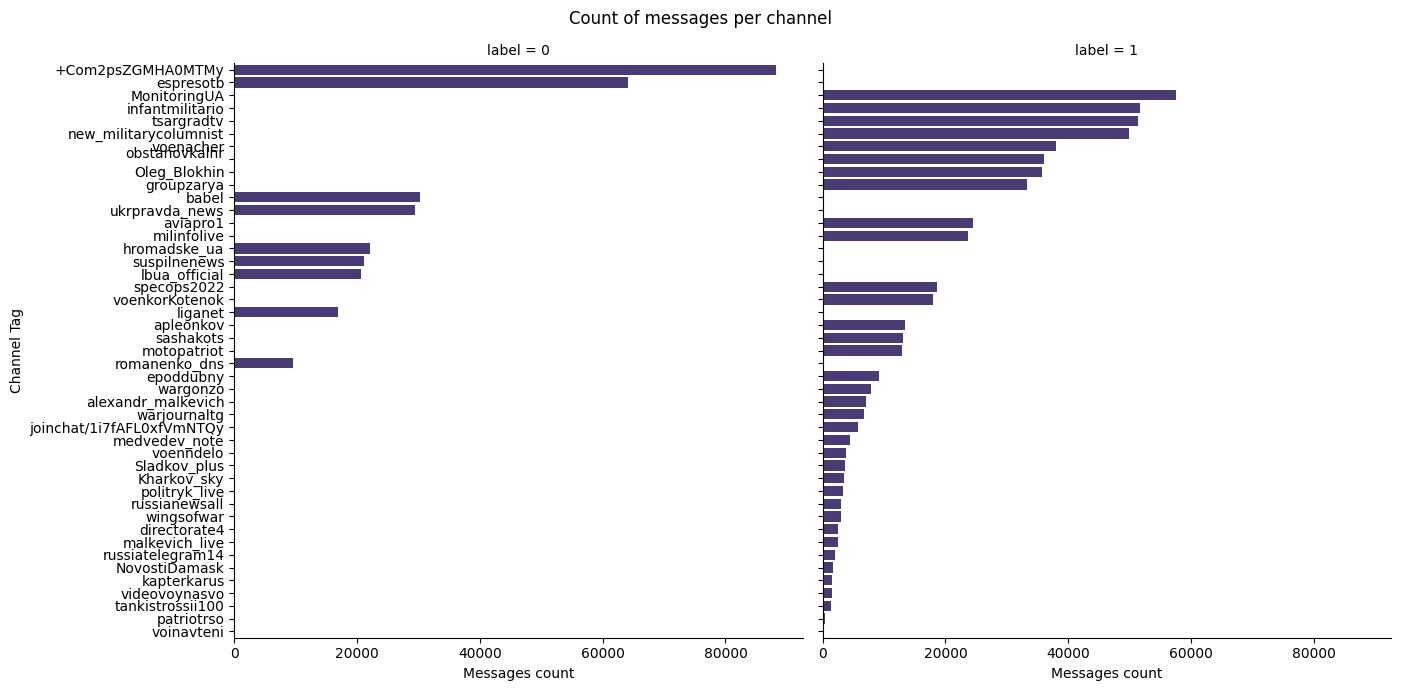

In [25]:
g = sns.catplot(data=df, 
            y='channel', 
            row='label', 
            kind='count',
            col='sourced_lang', 
            col_order=['ru', 'uk'],
            row_order=[0, 1],
            order=df['channel'].value_counts().index,
            height=7
           )

g.set_axis_labels('Messages count', 'Channel Tag')
g.fig.suptitle('Count of messages per channel')
plt.tight_layout()
# plt.savefig('count_of_messages_per_channel.pdf', bbox_inches='tight')

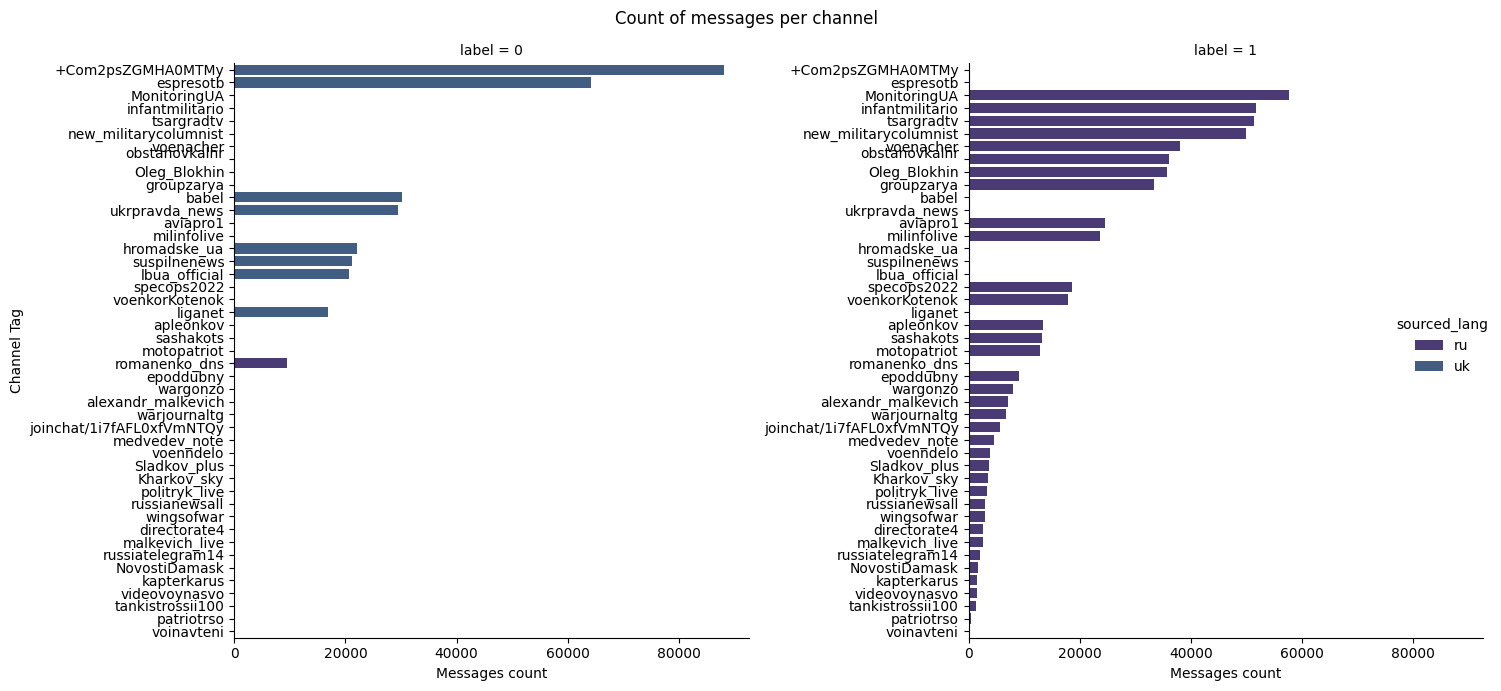

In [31]:
g = sns.catplot(data=df, 
            y='channel', 
            col='label', 
            kind='count',
            col_order=[0, 1],
            order=df['channel'].value_counts().index,
            height=7,
                sharey=False,
                hue='sourced_lang'
           )

g.set_axis_labels('Messages count', 'Channel Tag')
g.fig.suptitle('Count of messages per channel')
plt.tight_layout()
# plt.savefig('count_of_messages_per_channel.pdf', bbox_inches='tight')

# How many words do these messages contain

In [9]:
# For each category we will createa a dictionary
def word_length_in_df(df):
    
    messages_tokenized = df['text'].progress_apply(lambda x: nltk.word_tokenize(x)).tolist()
    messages_tokenized_flattened = set([j for i in messages_tokenized for j in i])
    vocab = set(messages_tokenized_flattened)
    words_length = [len(x) for x in vocab]
    return pd.Series(words_length, name='wordlen')

words_length = df.groupby(['label', 'sourced_lang']).apply(word_length_in_df)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 553468/553468 [03:15<00:00, 2834.71it/s]


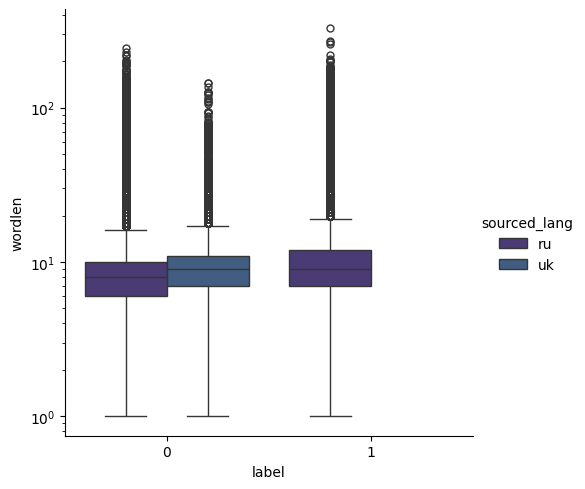

In [10]:
sns.catplot(
    data=words_length.reset_index(level=2, drop=True).reset_index(), 
    x='label', 
    y='wordlen',
    kind='box',
    hue='sourced_lang')
plt.yscale('log')

In [38]:
# For each category we will createa a dictionary
def message_len(df):
    return df.assign(
        message_len=df['text'].apply(len)
    )

message_lens = (
    df.groupby(['label', 'sourced_lang']).apply(message_len) 
)
message_lens

message_id                                               text   views  \
0            39818  –õ–∏–∫–≤–∏–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ä–æ—Å—Å–∏–π—Å–∫–∏–º–∏ –≤–æ–π—Å–∫–∞–º–∏ 10 –∏—é–Ω—è 2...    4357   
1            48968  –°–®–ê —Ç–æ—á–Ω–æ –Ω–µ¬†–ø–æ—Å—Ç–∞–≤—è—Ç –ö–∏–µ–≤—É –¥–∞–ª—å–Ω–æ–±–æ–π–Ω–æ–µ –æ—Ä—É–∂–∏...    1803   
2           101269  ‚ö†Ô∏è  üí• –õ–¨–í–Ü–í ‚Äî –í–ò–ë–£–•.\n\n–ß–µ–∫–∞—î–º–æ –Ω–∞ –æ—Ñ—ñ—Ü—ñ–π–Ω—É —ñ–Ω...   16956   
3            10693  –î–µ–ø—É—Ç–∞—Ç –ó–∞–ø–æ—Ä–æ–∂—Å–∫–æ–≥–æ –æ–±–ª—Å–æ–≤–µ—Ç–∞ –ï–≤–≥–µ–Ω–∏–π –ë–∞–ª–∏—Ü–∫–∏...  149223   
4            19528  üáÆüá±–†–µ–π–¥ –∏–∑—Ä–∞–∏–ª—å—Å–∫–æ–π –∞—Ä–º–∏–∏ –≤ –ª–∞–≥–µ—Ä—å –î–∂–µ–Ω–∏–Ω: —à–µ—Å—Ç...   10525   
...            ...                                                ...     ...   
855845        9310  –û–ë–©–ê–õ–°–Ø –°–ï–ì–û–î–ù–Ø \n–° –ü–õ–ï–ù–ù–´–ú –£–ö–†–ê–ò–ù–°–ö–ò–ú –î–ï–°–ê–ù–¢–ù...  367149   
855846       29844  ‚ùóÔ∏è–†–æ—Å—Å–∏–π—Å–∫–∏–µ –≤–æ–µ–Ω–Ω—ã–µ –æ—Ç–±–∏–ª–∏ —É –í–°–£ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ...   16042   
855847       99108  ‚ùóÔ∏è–£–∫—Ä–∞–∏–Ω—Å–∫–∏–π –¢–ì-–∫–∞–Ω–∞–ª "–†–µ–∑–∏–¥–µ–Ω—Ç" —Å–æ —Å—Å—ã–ª–∫–æ–π –Ω–∞...   59621   
855848       45762  –ú–∏–Ω–æ–±–æ—Ä–æ–Ω—ã –†–§ –∑–∞—è–≤–∏–ª–æ, —á—Ç–æ —Å—Ç—Ä–∞–Ω—ã, –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é...   19360   
855849      117211  –ö–æ–ª–æ–Ω–∏ –∑¬†–≥—É–º–∞–Ω—ñ—Ç–∞—Ä–Ω–æ—é –¥–æ–ø–æ–º–æ–≥–æ—é –≤—ñ–¥¬†–Ñ–≥–∏–ø—Ç—É –ø–æ—á...    9988   

                             date                channel  label sourced_lang  \
0       2022-06-12 20:29:58+00:00           Oleg_Blokhin      1           ru   
1       2023-05-10 08:55:43+00:00           MonitoringUA      1           ru   
2       2023-07-05 23:34:27+00:00      +Com2psZGMHA0MTMy      0           uk   
3       2022-03-19 10:46:38+00:00           Oleg_Blokhin      1           ru   
4       2023-03-07 18:38:05+00:00               aviapro1      1           ru   
...                           ...                    ...    ...          ...   
855845  2023-12-14 12:53:04+00:00           Sladkov_plus      1           ru   
855846  2023-07-02 07:23:38+00:00               aviapro1      1           ru   
855847  2023-01-07 13:59:01+00:00  new_militarycolumnist      1           ru   
855848  2024-01-04 11:39:00+00:00             groupzarya      1           ru   
855849  2023-10-17 05:20:33+00:00      +Com2psZGMHA0MTMy      0           uk   

        message_len  
0               279  
1               436  
2                76  
3              1006  
4               504  
...             ...  
855845          745  
855846           93  
855847          290  
855848          470  
855849          610  

[855850 rows x 8 columns]

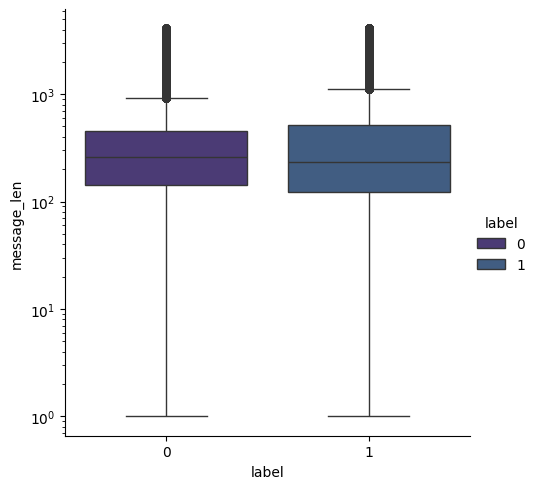

In [51]:
sns.catplot(
    data=message_lens, 
    x='label', 
    hue='label',
    y='message_len',
    kind='box',)

plt.yscale('log')

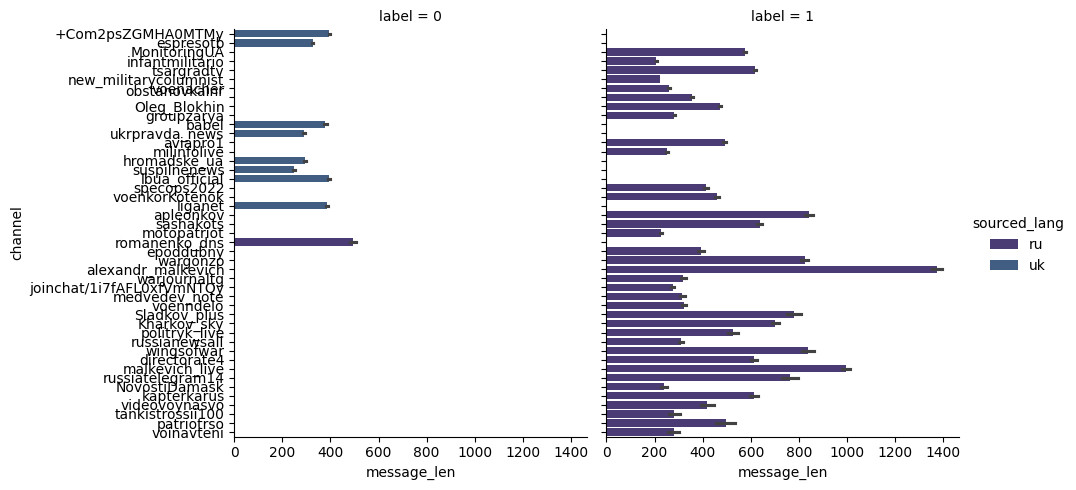

In [47]:
sns.catplot(
    data=message_lens, 
    y='channel',
    x='message_len',
    kind='bar',
col='label', hue='sourced_lang', order=df['channel'].value_counts().index)

# plt.xscale('log')
# plt.savefig('average_message_len_per_channel.pdf')

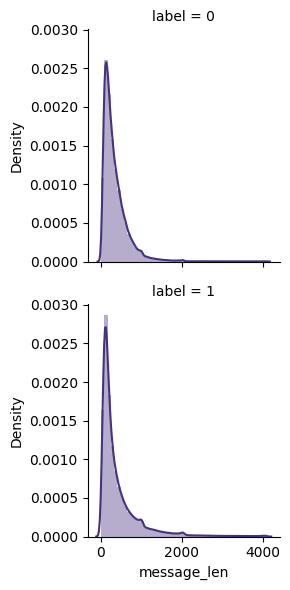

In [13]:
g = sns.FacetGrid(data=message_lens, row='label')
g.map(sns.distplot, 'message_len')


In [14]:
# Sence length in words
def sentence_length(df):
    messages_tokenized = df['text'].progress_apply(lambda x: nltk.sent_tokenize(x)).tolist()
    sentences = [j for i in messages_tokenized for j in i]
    words_per_sentence = [len(nltk.word_tokenize(s)) for s in sentences]
    chars_per_sentence = [len(s) for s in sentences]
    return pd.DataFrame({
        'words_per_sentence': words_per_sentence,
        'chars_per_sentence': chars_per_sentence
    })

sentence_len = (
    df.groupby(['label', 'sourced_lang']).apply(sentence_length)
    .reset_index(level=2, drop=True)).reset_index()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 553468/553468 [00:40<00:00, 13779.34it/s]


In [15]:
sentence_len['words_per_sentence'] = np

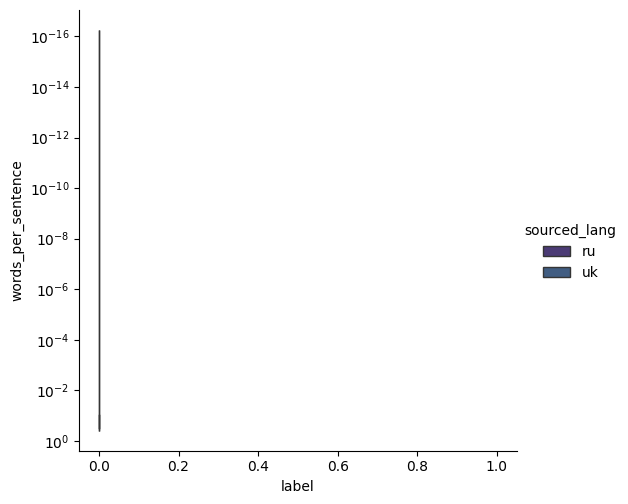

In [16]:
sns.catplot(data=sentence_len,
            y='words_per_sentence',
           x='label', hue='sourced_lang', 
           kind='box')
plt.yscale('log')

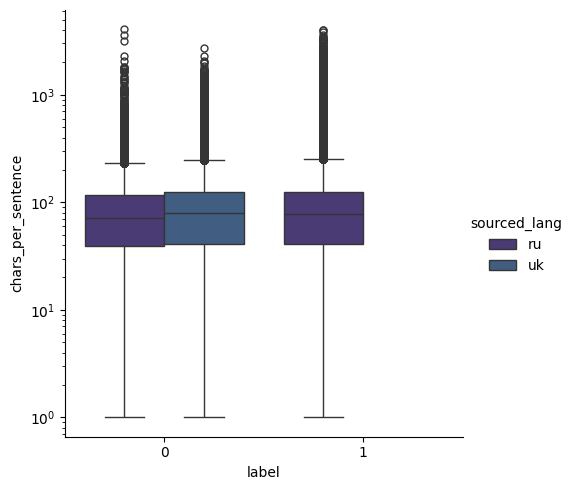

In [17]:
sns.catplot(data=sentence_len,
            y='chars_per_sentence',
           x='label', hue='sourced_lang', 
           kind='box')
plt.yscale('log')

# Amount of adjectives in the messages

In [62]:
morph_uk = pymorphy2.MorphAnalyzer(lang='uk')
morph_ru =  pymorphy2.MorphAnalyzer(lang='ru')
pos_counts = [
    'ADJF',
    'ADJS',
    'NUMR', # more numner - less propagandistic
    'NPRO', # more pronouns - more propagandsitic
]

def get_adjectives_count_in_text(row):
    pos_counter = Counter()
    text, sourced_lang = row['text'], row['sourced_lang']
    
    for token in nltk.word_tokenize(text):
        if sourced_lang == 'uk':
            token_pos = morph_uk.parse(token)[0]
        else: 
            token_pos = morph_ru.parse(token)[0]
        pos_counter[token_pos.tag.POS] += 1
        
    return pd.Series([
        pos_counter[key] for key in pos_counts
    ], index=pos_counts)



# adj_df = adj_sampled.assign(
#     *adj_sampled.progress_apply(get_adjectives_count_in_text, result_type='expand',
#                      axis=1)
# )
# adj_df


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20000/20000 [01:59<00:00, 167.05it/s]


ADJF  ADJS  NUMR  NPRO
16084      4     0     0     1
353091     0     0     0     0
790131     7     0     0     0
161906     1     0     0     0
299543     4     0     1     1
...      ...   ...   ...   ...
242295     3     0     0     0
315462     3     0     0     1
561135    38     2     0    20
294659    22     0     0     7
792550     0     0     0     0

[20000 rows x 4 columns]

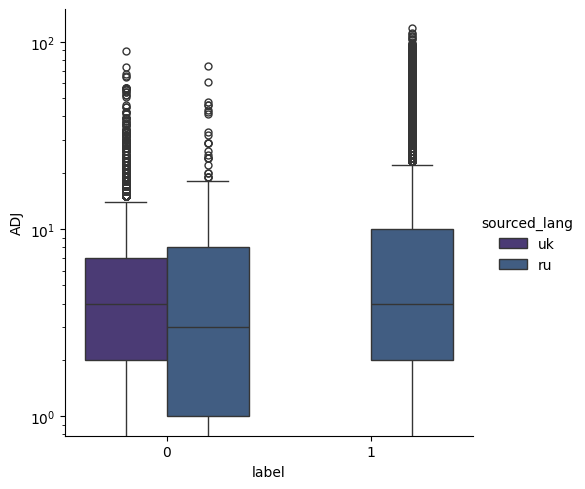

In [76]:
adj_sampled = df.sample(20_000, random_state=42)
pos_df = adj_sampled.progress_apply(get_adjectives_count_in_text, result_type='expand',
                     axis=1)
text_pos_df = adj_sampled.merge(pos_df, left_index=True, right_index=True)
text_pos_df['ADJ'] = text_pos_df['ADJF'] + text_pos_df['ADJS']

sns.catplot(data=text_pos_df,
            y='ADJ',
           x='label', hue='sourced_lang', 
           kind='box')

plt.yscale('log')

In [104]:
adj_sampled = df.sample(100_000, random_state=42)
pos_df = adj_sampled.progress_apply(get_adjectives_count_in_text, result_type='expand',
                     axis=1)
text_pos_df = adj_sampled.merge(pos_df, left_index=True, right_index=True)
text_pos_df['ADJ'] = text_pos_df['ADJF'] + text_pos_df['ADJS']


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100000/100000 [10:01<00:00, 166.33it/s]


In [105]:
punctuation = set(string.punctuation)     
stopwords_set = ukrainian_stopwords | set(stopwords.words('russian'))

def should_skip_token(token: str):
        return (token in stopwords_set or 
               token in punctuation)
                                          
def count_tokens(text):
    tokens_count = 0

    for i in nltk.word_tokenize(text):
        if not should_skip_token(i):
            tokens_count += 1
    return tokens_count
                                          
                                          
word_counts = text_pos_df['text'].progress_apply(count_tokens)
word_counts


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100000/100000 [00:33<00:00, 2988.85it/s]


16084     25
353091    13
790131    23
161906     9
299543    46
          ..
96054     48
622456     2
207262    65
652131    21
384813    19
Name: text, Length: 100000, dtype: int64

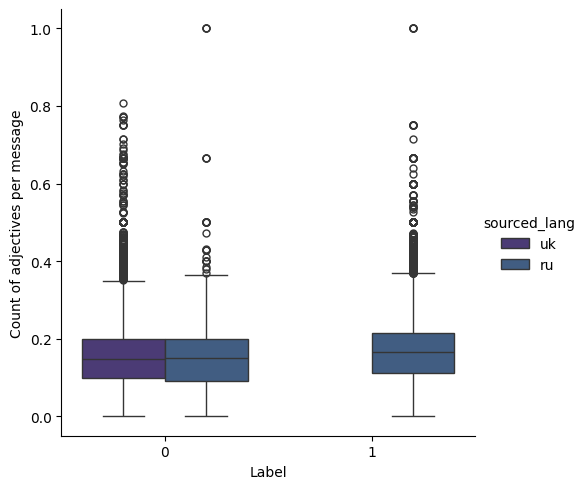

In [107]:
# Count of adjectives per message length
text_pos_len_df['adj_per_word'] = text_pos_len_df['ADJ']  \
/ word_counts
sns.catplot(data=text_pos_len_df,
            y='adj_per_word',
           x='label', hue='sourced_lang', 
           kind='box')

plt.ylabel('Count of adjectives per message')
plt.xlabel('Label')

# plt.savefig('percentage_of_adjective_per_message.pdf')

Text(0.5, 28.999999999999986, 'Label')

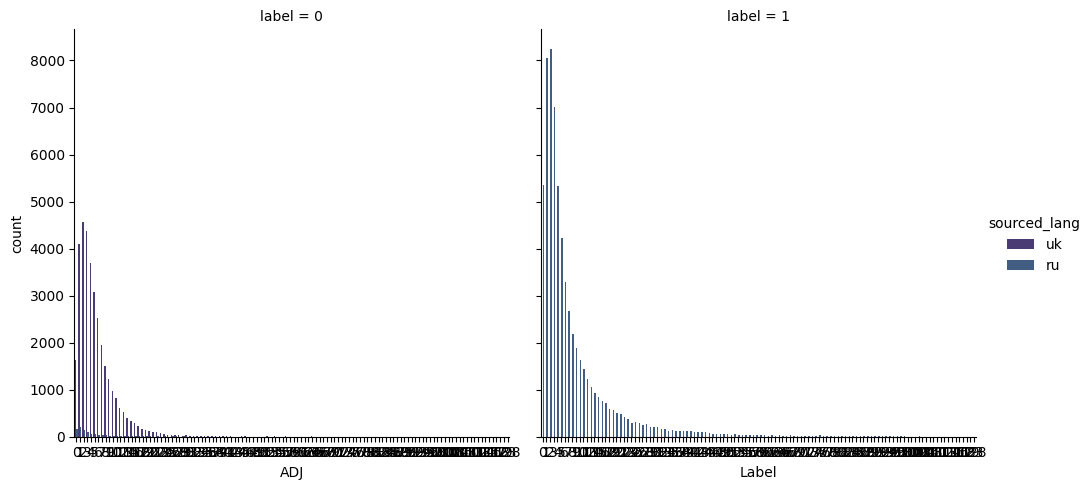

In [90]:
sns.catplot(data=text_pos_df,
        
           x='ADJ', hue='sourced_lang', 
            col='label',
           kind='count')

# plt.ylabel('Count of adjectives per message.pdf')
plt.xlabel('Label')

In [ ]:
g = sns.catplot(data=df, 
            y='channel', 
            col='label', 
            kind='count',
            col_order=[0, 1],
            order=df['channel'].value_counts().index,
            height=7,
                sharey=False,
                hue='sourced_lang'
           )

g.set_axis_labels('Messages count', 'Channel Tag')
g.fig.suptitle('Count of messages per channel')
plt.tight_layout()
# plt.savefig('count_of_messages_per_channel.pdf', bbox_inches='tight')

# What are the most popular bi-and-trigrams

In [112]:
def get_n_gram(df, n):
    punctuation = set(string.punctuation)
    
    def process_text(text):
        # Filter text from url and character

        
        tokens = []
        for i in nltk.word_tokenize(text):
            if not should_skip_token(i):
                tokens.append(i)
                
                
        return nltk.ngrams(tokens, n)

    ngrams_list = df['text'].apply(process_text)
        
    words_list = [ngram for ngram_message in ngrams_list for ngram in ngram_message]
    return Counter(words_list)
        
    # make a total amount of words
    # manually exclude thos

In [113]:
bigrams_counter_df = df.groupby(['label', 'sourced_lang']).progress_apply(partial(get_n_gram, n=2))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [05:25<00:00, 108.53s/it]


In [116]:
pd.DataFrame(bigrams_counter_df.apply(lambda x: x.most_common(50)).reset_index().iloc[1].loc[0], columns=[1,2])

1      2
0             (–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è, ZN.UA)  31287
1            (üöÄ–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è, ZN.UA)  28083
2                          ('', ‚Äî)  20629
3                 (üëâ, –ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è)  16759
4                      (LB.ua, FB)  15499
5                    (FB, Twitter)  15499
6               (Twitter, YouTube)  15465
7                    (—á–∞—Ç—É, ZN.UA)  11186
8             (üöÄ–ü—Ä–∏—î–¥–Ω–∞—Ç–∏—Å—è, —á–∞—Ç—É)  11026
9            (üëâ–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è, ZN.UA)  10679
10                          (¬ª, ‚Äî)   9425
11                   (–ó–∞, —Å–ª–æ–≤–∞–º–∏)   9246
12                         ('', ‚Äì)   8842
13                        ('', ``)   6082
14         (–í–æ–ª–æ–¥–∏–º–∏—Ä, –ó–µ–ª–µ–Ω—Å—å–∫–∏–π)   5563
15                    (–ó–∞, –¥–∞–Ω–∏–º–∏)   5127
16            (–ø–æ–≤—ñ—Ç—Ä—è–Ω–∞, —Ç—Ä–∏–≤–æ–≥–∞)   4761
17        (hromadske, –ø—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è)   3754
18                  (üß°, hromadske)   3638
19                     (‚Äî, –∑–∞—è–≤–∏–≤)   3548
20             (–ø–æ–≤—ñ–¥–æ–º–∏–≤, –≥–æ–ª–æ–≤–∞)   3519
21  (–ø–æ–≤–Ω–æ–º–∞—Å—à—Ç–∞–±–Ω–æ–≥–æ, –≤—Ç–æ—Ä–≥–Ω–µ–Ω–Ω—è)   3506
22                          (¬ª, ¬´)   3445
23         (–ø–∞–±–ª—ñ–∫–∏, –ø–æ–≤—ñ–¥–æ–º–ª—è—é—Ç—å)   3429
24               (–ü–æ–≤—ñ—Ç—Ä—è–Ω—ñ, —Å–∏–ª–∏)   3273
25              (–æ–±–æ—Ä–æ–Ω–∏, –£–∫—Ä–∞—ó–Ω–∏)   2904
26            (–Ω–∞—Å–µ–ª–µ–Ω–∏—Ö, –ø—É–Ω–∫—Ç—ñ–≤)   2839
27                (–ü—Ä–æ, –ø–æ–≤—ñ–¥–æ–º–∏–≤)   2830
28                   (–≥–æ–ª–æ–≤–∞, –û–í–ê)   2792
29                        (–ø–∞–º, ‚Äô)   2792
30              (—Ä–∞–∫–µ—Ç–Ω–æ–≥–æ, —É–¥–∞—Ä—É)   2776
31                  (–±–æ–π–æ–≤–∏—Ö, –¥—ñ–π)   2725
32             (–í–µ–ª–∏–∫–æ—ó, –ë—Ä–∏—Ç–∞–Ω—ñ—ó)   2679
33           (–ø–æ–≤—ñ—Ç—Ä—è–Ω–æ—ó, —Ç—Ä–∏–≤–æ–≥–∏)   2674
34                        (``, –ú–∏)   2650
35                (üëÄ, –ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—å)   2643
36         (–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—å, LIGA.net)   2595
37               (–º—ñ—Å—å–∫–∏–π, –≥–æ–ª–æ–≤–∞)   2548
38         (–π–¥–µ—Ç—å—Å—è, –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—ñ)   2507
39           (–æ—Ç—Ä–∏–º–∞–ª–∏, –ø–æ—Ä–∞–Ω–µ–Ω–Ω—è)   2468
40              (–º—ñ—Å—Ü–µ–≤—ñ, –ø–∞–±–ª—ñ–∫–∏)   2451
41                  (‚Äî, –ø–æ–≤—ñ–¥–æ–º–∏–≤)   2449
42         (—Ä–æ—Å—ñ–π—Å—å–∫–∏—Ö, –æ–∫—É–ø–∞–Ω—Ç—ñ–≤)   2403
43                      (–£, –ö–∏—î–≤—ñ)   2401
44          (–≤—ñ–π—Å—å–∫–æ–≤–æ—ó, –¥–æ–ø–æ–º–æ–≥–∏)   2344
45                  (‚Äî, –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç)   2260
46                  (‚Äî, –ü–æ–≤—ñ—Ç—Ä—è–Ω—ñ)   2260
47                 (—Å–∏–ª–∏, –£–∫—Ä–∞—ó–Ω–∏)   2240
48                         (–∑–≤, ‚Äô)   2228
49            (—Ä–æ—Å—ñ–π—Å—å–∫—ñ, –≤—ñ–π—Å—å–∫–∞)   2200

In [117]:
trigram_counter_df = df.groupby(['label', 'sourced_lang']).progress_apply(partial(get_n_gram, n=3))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [05:33<00:00, 111.03s/it]


In [118]:
pd.DataFrame(trigram_counter_df.apply(lambda x: x.most_common(50)).reset_index().iloc[1].loc[0], columns=[1,2])

1      2
0                      (üëâ, –ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è, ZN.UA)  16275
1                         (LB.ua, FB, Twitter)  15498
2                       (FB, Twitter, YouTube)  15460
3                  (üöÄ–ü—Ä–∏—î–¥–Ω–∞—Ç–∏—Å—è, —á–∞—Ç—É, ZN.UA)  11025
4                  (üß°, hromadske, –ø—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è)   3637
5                   (üëÄ, –ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—å, LIGA.net)   2593
6             (–º—ñ—Å—Ü–µ–≤—ñ, –ø–∞–±–ª—ñ–∫–∏, –ø–æ–≤—ñ–¥–æ–º–ª—è—é—Ç—å)   2264
7                         (‚Äî, –ü–æ–≤—ñ—Ç—Ä—è–Ω—ñ, —Å–∏–ª–∏)   2188
8                      (‚Äî, –ø–æ–≤—ñ—Ç—Ä—è–Ω–∞, —Ç—Ä–∏–≤–æ–≥–∞)   2185
9             (–£–∫—Ä–∞—ó–Ω–∏, –í–æ–ª–æ–¥–∏–º–∏—Ä, –ó–µ–ª–µ–Ω—Å—å–∫–∏–π)   2153
10                             ('', ‚Äî, –∑–∞—è–≤–∏–≤)   2077
11                           (``, –ï—Å–ø—Ä–µ—Å–æ, '')   1967
12               (—Ä—É—Å—Å–∫–æ–º, –ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è, ZN.UA)   1789
13                   ('', üöÄ–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è, ZN.UA)   1737
14                  (–ü–æ–≤—ñ—Ç—Ä—è–Ω—ñ, —Å–∏–ª–∏, –£–∫—Ä–∞—ó–Ω–∏)   1718
15             (–ß–µ–∫–∞—î–º–æ, –æ—Ñ—ñ—Ü—ñ–π–Ω—É, —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—é)   1641
16                    (–ø–æ–≤—ñ–¥–æ–º–∏–≤, –≥–æ–ª–æ–≤–∞, –û–í–ê)   1483
17                            ('', ‚Äî, –π–¥–µ—Ç—å—Å—è)   1454
18  (–ø–æ–≤—ñ–¥–æ–º–ª—è—é—Ç—å, –∫–æ—Ä–µ—Å–ø–æ–Ω–¥–µ–Ω—Ç–∏, –°—É—Å–ø—ñ–ª—å–Ω–æ–≥–æ)   1428
19             (–ø–∞–±–ª—ñ–∫–∏, –ø–æ–≤—ñ–¥–æ–º–ª—è—é—Ç—å, –í–ò–ë–£–•–ò)   1420
20                           ('', ‚Äî, –∑–∞–∑–Ω–∞—á–∏–≤)   1383
21              (–£–∫—Ä–∞—ó–Ω–∏, üöÄ–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è, ZN.UA)   1372
22                   (—Ç–µ–ª–µ–∫–∞–Ω–∞–ª—É, ``, –ï—Å–ø—Ä–µ—Å–æ)   1345
23                 (–ö–∞—Ä—Ç–∞, –ø–æ–≤—ñ—Ç—Ä—è–Ω–∏—Ö, —Ç—Ä–∏–≤–æ–≥)   1282
24                          (New, York, Times)   1251
25                           (``, –ü—ñ–≤–¥–µ–Ω—å, '')   1242
26              (–ó–∞, –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ—é, —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—î—é)   1202
27                  (–ø–æ–≤—ñ—Ç—Ä—è–Ω–∏—Ö, —Ç—Ä–∏–≤–æ–≥, –î–∞–Ω—ñ)   1183
28                      (—Ç—Ä–∏–≤–æ–≥, –î–∞–Ω—ñ, —Å—Ç–∞–Ω–æ–º)   1183
29                               (–∑–≤, ‚Äô, —è–∑–∫—É)   1140
30             (–ø—Ä–µ–∑–∏–¥–µ–Ω—Ç, –£–∫—Ä–∞—ó–Ω–∏, –í–æ–ª–æ–¥–∏–º–∏—Ä)   1122
31               (—Å–∏–ª–∏, –£–∫—Ä–∞—ó–Ω–∏, üöÄ–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è)   1108
32                          ('', ‚Äî, –ø–æ–≤—ñ–¥–æ–º–∏–≤)   1052
33           (–∑–æ—Å–µ—Ä–µ–¥–∂–µ–Ω–Ω—è, –æ—Å–æ–±–æ–≤–æ–≥–æ, —Å–∫–ª–∞–¥—É)   1026
34                 ('', –π–¥–µ—Ç—å—Å—è, –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—ñ)   1008
35                            (The, New, York)   1007
36                          (–°–®–ê, –î–∂–æ, –ë–∞–π–¥–µ–Ω)   1005
37                (–ø–æ–≤—ñ–¥–æ–º–∏–≤, –º—ñ—Å—å–∫–∏–π, –≥–æ–ª–æ–≤–∞)   1003
38                  (–ø–æ–≤—ñ–¥–æ–º–∏–≤, –∫–µ—Ä—ñ–≤–Ω–∏–∫, –û–í–ê)    984
39                              (¬´, –ë–∞–±–µ–ª—å, ¬ª)    983
40       (–≤–∏–±—É—Ö–∏, –ø–æ–≤—ñ–¥–æ–º–ª—è—é—Ç—å, –∫–æ—Ä–µ—Å–ø–æ–Ω–¥–µ–Ω—Ç–∏)    975
41               (–ø–∞–∫–µ—Ç, –≤—ñ–π—Å—å–∫–æ–≤–æ—ó, –¥–æ–ø–æ–º–æ–≥–∏)    973
42             (—É–∫—Ä–∏—Ç—Ç—è—Ö, üöÄ–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è, ZN.UA)    954
43                  (—Å–∏—Å—Ç–µ–º, –∑–∞–ª–ø–æ–≤–æ–≥–æ, –≤–æ–≥–Ω—é)    933
44                  (‚Äî, –π–¥–µ—Ç—å—Å—è, –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω–Ω—ñ)    915
45            (–æ–∑–±—Ä–æ—î–Ω–Ω—è, –≤—ñ–π—Å—å–∫–æ–≤–æ—ó, —Ç–µ—Ö–Ω—ñ–∫–∏)    915
46                          (–ó–∞, –º–∏–Ω—É–ª—É, –¥–æ–±—É)    903
47             (—Ä–µ–∞–∫—Ç–∏–≤–Ω–∏—Ö, —Å–∏—Å—Ç–µ–º, –∑–∞–ª–ø–æ–≤–æ–≥–æ)    857
48                   (–ó–∞, –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–º–∏, –¥–∞–Ω–∏–º–∏)    857
49                              (¬ª, ‚Äî, –∑–∞—è–≤–∏–≤)    856

In [124]:
bigrams_counter_df.reset_index().group

label sourced_lang                                                  0
0      0           ru  {('–≠—Ñ–∏—Ä', '—Å–µ–≥–æ–¥–Ω—è'): 15, ('—Å–µ–≥–æ–¥–Ω—è', '–Ω–∞—á–∏–Ω–∞–µ...
1      0           uk  {('‚ö†Ô∏è', 'üí•'): 189, ('üí•', '–õ–¨–í–Ü–í'): 1, ('–õ–¨–í–Ü–í'...
2      1           ru  {('–õ–∏–∫–≤–∏–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–π', '—Ä–æ—Å—Å–∏–π—Å–∫–∏–º–∏'): 1, ('—Ä–æ—Å—Å...

In [139]:
bigram_df = bigrams_counter_df.copy()

bigram_df.loc[0, 'uk'].update(bigram_df.loc[0, 'ru'])
bigram_df = (bigram_df
             .drop(index=[(0, 'ru')])
             .reset_index(level=1)
             .drop(columns=['sourced_lang'])
            .rename(columns={0: 'counter'})
            )


In [180]:
# bigrams_counter_df
# trtrigram_counter_df

# Join them so that the distinction is only made by label
# Print top 50 for each 
negative_stopword_tuples = [
(('–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è', 'ZN.UA'), 31287),
(('üöÄ–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è', 'ZN.UA'), 28083),
(("''", '‚Äî'), 21035),
(('üëâ', '–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è'), 16773),
(('Twitter', 'YouTube'), 16137),
(('LB.ua', 'FB'), 15499),
(('FB', 'Twitter'), 15499),
(('¬ª', '‚Äî'), 11329),
(('—á–∞—Ç—É', 'ZN.UA'), 11186),
(('üöÄ–ü—Ä–∏—î–¥–Ω–∞—Ç–∏—Å—è', '—á–∞—Ç—É'), 11026),
(('üëâ–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è', 'ZN.UA'), 10679),
(("''", '‚Äì'), 9234),
(("''", '``'), 7636),
(('¬ª', '¬´'), 5979),
(('hromadske', '–ø—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—è'), 3754),
(('üß°', 'hromadske'), 3638),
(('¬ª', '‚Äì'), 3385),
(('üëÄ', '–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—å'), 2643),
(('–ü—ñ–¥–ø–∏—Å–∞—Ç–∏—Å—å', 'LIGA.net'), 2595),
(('–∑–≤', '\''), 2438)
]
positive_stopword_tuples = [
(('¬ª', '‚Äî'), 19328),
(('–°–∞–π—Ç', '–î–∑–µ–Ω'), 18486),
(('üü•', '–°–∞–π—Ç'), 16606),
(('üëâ', '–ü–æ–¥–ø–∏—Å–∞—Ç—å—Å—è'), 16293),
(('¬ª', '¬´'), 15987),
(('–ù–æ–≤–æ—Å—Ç–∏', '–ü–æ–¥–ø–∏—Å–∞—Ç—å—Å—è'), 10389),
(('–Ø–Ω–¥–µ–∫—Å', '–ù–æ–≤–æ—Å—Ç–∏'), 9500),
(('–ø—Ä–∞–≤–¥—É', '–ü–æ–¥–ø–∏—à–∏—Å—å'), 9020),
(('–î–∑–µ–Ω', '–ü–æ–¥–ø–∏—Å–∞—Ç—å—Å—è'), 8988),
(('üí¨–ß–∞—Ç', 'https'), 6862),
(('–î–∑–µ–Ω', '–Ø–Ω–¥–µ–∫—Å'), 5540),
(('–ö–æ–Ω—Ñ–ª–∏–∫—Ç', '–ü–æ–¥–ø–∏—Å–∞—Ç—å—Å—è'), 5134),
(('ü§¥–¶–∞—Ä—å–≥—Ä–∞–¥.–¢–í', '–ù–µ'), 5070),
(('–£–∫—Ä–∞–∏–Ω–µ', '‚úÖ–ü–æ–¥–ø–∏—Å–∞—Ç—å—Å—è‚úÖ'), 4835),
(('–£–∫—Ä–∞–∏–Ω–∞', 'new_militarycolumnist'), 11054),   
 (("''", '``'), 7711)
]

for i, values in zip([0, 1], [
  negative_stopword_tuples,
  positive_stopword_tuples
]):
    for t in values:
        del bigram_df.loc[i]['counter'][t[0]]
# Manully filter words that are not relevant
# Draw a plot with two columns 

In [182]:
bigram_vis_df = pd.concat([pd.DataFrame(bigram_df.loc[0]['counter'].most_common(10), columns=['name', 'count']).assign(label=0),
          pd.DataFrame(bigram_df.loc[1]['counter'].most_common(10), columns=['name', 'count']).assign(label=1)])

In [183]:
bigram_vis_df['name'] =bigram_vis_df['name'].astype('str')

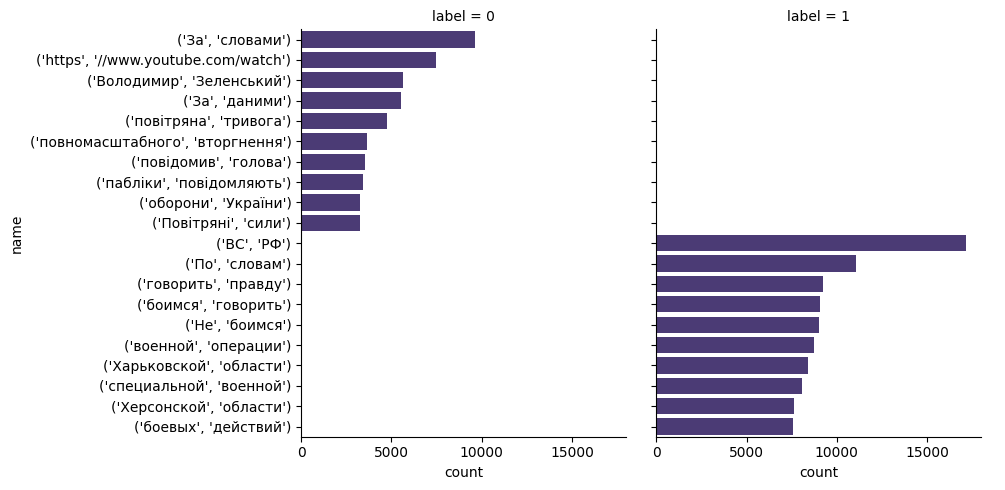

In [184]:
sns.catplot(data=bigram_vis_df, y='name', x='count', col='label', kind='bar')

In [185]:
from IPython.display import display

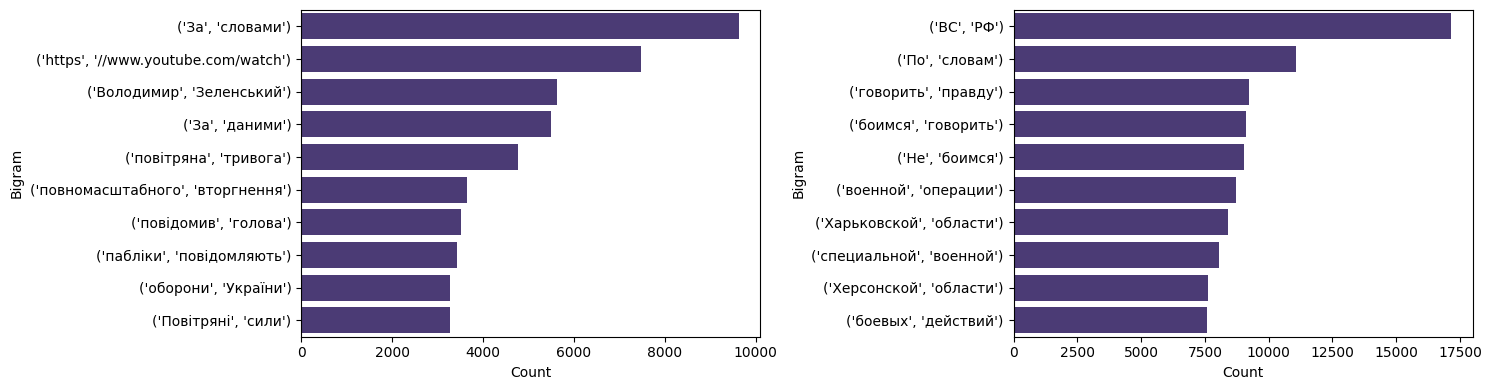

In [190]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

for row_idx, label in enumerate(bigram_vis_df['label'].unique()):
    temp_df = bigram_vis_df[bigram_vis_df['label'] == label]
    sns.barplot(
        data=temp_df, 
        y='name',
        x='count',
        ax=axes[row_idx])
    axes[row_idx].set_xlabel('Count')
    axes[row_idx].set_ylabel('Bigram')
    
plt.tight_layout()
# plt.savefig('bigram_barplot.pdf')


# What channels were used 

In [ ]:
channel_count = df.groupby(['label', 'sourced_lang'])['channel'].value_counts()
channel_count.index.names = ['Label', 'Language', 'Channel Tag']
channel_count.name = 'Count'
# print(channel_count.reset_index().set_index(['Label', 'Language']).to_latex())